# Импорти и глобални параметри

In [69]:
from dask import dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_alive

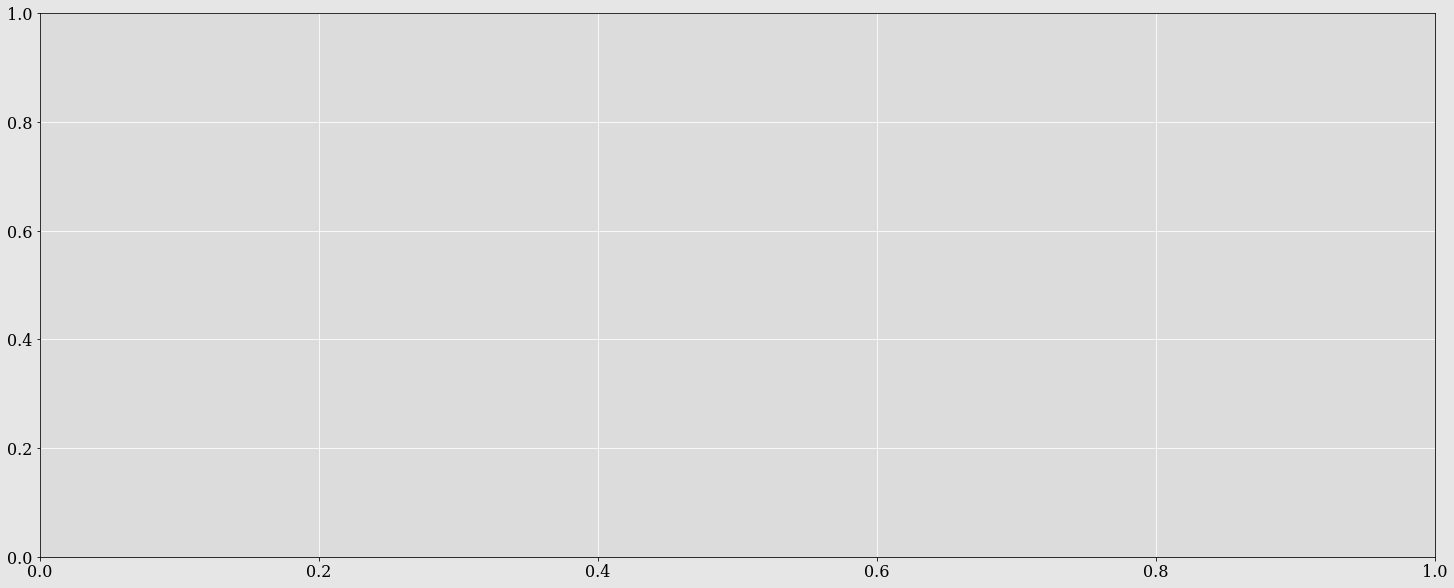

In [14]:
plt.style.use('style.mplstyle')

fig = plt.figure()
ax = plt.axes()

# Импортиране на файлове

In [15]:
ddf_users = dd.read_csv('data\\raw\\2022_place_canvas_history_users.csv')
ddf_users.head()

,user_id
0,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...
1,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...
2,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...
3,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...
4,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...


In [16]:
ddf_main = dd.read_csv('data\\raw\\2022_place_canvas_history_core.csv')
ddf_main.head()

,timestamp,pixel_color,coordinate
0,0,#7EED56,"42,42"
1,12356,#00A368,"999,999"
2,16311,#3690EA,"44,42"
3,21388,#D4D7D9,"2,2"
4,34094,#3690EA,"23,23"


In [17]:
ddf_date = dd.read_csv('data\\raw\\2022_place_canvas_history_datetime.csv')
ddf_date.head()

,datetime
0,2022-04-01 12:00:00
1,2022-04-01 12:00:00
2,2022-04-01 12:00:00
3,2022-04-01 12:00:00
4,2022-04-01 12:00:00


In [18]:
ddf_pivoted = dd.read_csv('data\\raw\\2022_place_canvas_history_pivoted.csv')
ddf_pivoted.head()

,datetime,#000000,#00A368,#2450A4,#3690EA,#51E9F4,#7EED56,#811E9F,#898D90,#9C6926,...,#BE0039,#FF3881,#00CCC0,#515252,#6D001A,#94B3FF,#DE107F,#E4ABFF,#FFB470,#FFF8B8
0,2022-04-01 12:00:00,0,2,3,2,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-04-01 13:00:00,117511,21775,83172,15056,24328,21971,19421,7081,6169,...,0,0,0,0,0,0,0,0,0,0
2,2022-04-01 14:00:00,198737,33085,115221,20169,38124,30806,26811,12597,9609,...,0,0,0,0,0,0,0,0,0,0
3,2022-04-01 15:00:00,242980,35452,98686,25440,42816,33479,27869,17086,12235,...,0,0,0,0,0,0,0,0,0,0
4,2022-04-01 16:00:00,246588,40658,99270,29857,49147,37166,32077,20787,11657,...,0,0,0,0,0,0,0,0,0,0


# Работа с таблицата за потребители

In [19]:
all_users = ddf_users.user_id.value_counts().compute().reset_index(name='num_placed_pixels')

### Стълбовидна диаграма за 20-те най-активни потребители

In [20]:
most_active_users = all_users.head(20).set_index('index')
most_active_users.head()

,num_placed_pixels
index,
kgZoJz//JpfXgowLxOhcQlFYOCm8m6upa6Rpltcc63K6Cz0vEWJF/RYmlsaXsIQEbXrwz+Il3BkD8XZVx7YMLQ==,795
JMlte6XKe+nnFvxcjT0hHDYYNgiDXZVOkhr6KT60EtJAGaezxc4e/eah6JzTReWNdTH4fLueQ20A4drmfqbqsw==,781
LNbGhj45pAeCvBYQF1dPvwx1zVfVTy8AdRxTSHi0pR9YeabE3sAd3Rz1MbLFT5k14j0+grrVgqYO1/6BA/jBfQ==,777
8USqGo14WuZQLG7PSAwqfFwICkU0G4VyHZTuV8D1QSbQHE5GFdC2mIK/pMEC/qF1FQH912SDim3ptEFkYPrYMQ==,767
K54RRTUCFuOU55RzSTkjo/ftbJqVi9miyt52YV6NlENRfUyJTPJKBC47N/s2eh4iNdAKMKxa3gvL2XFqCc9AqQ==,767


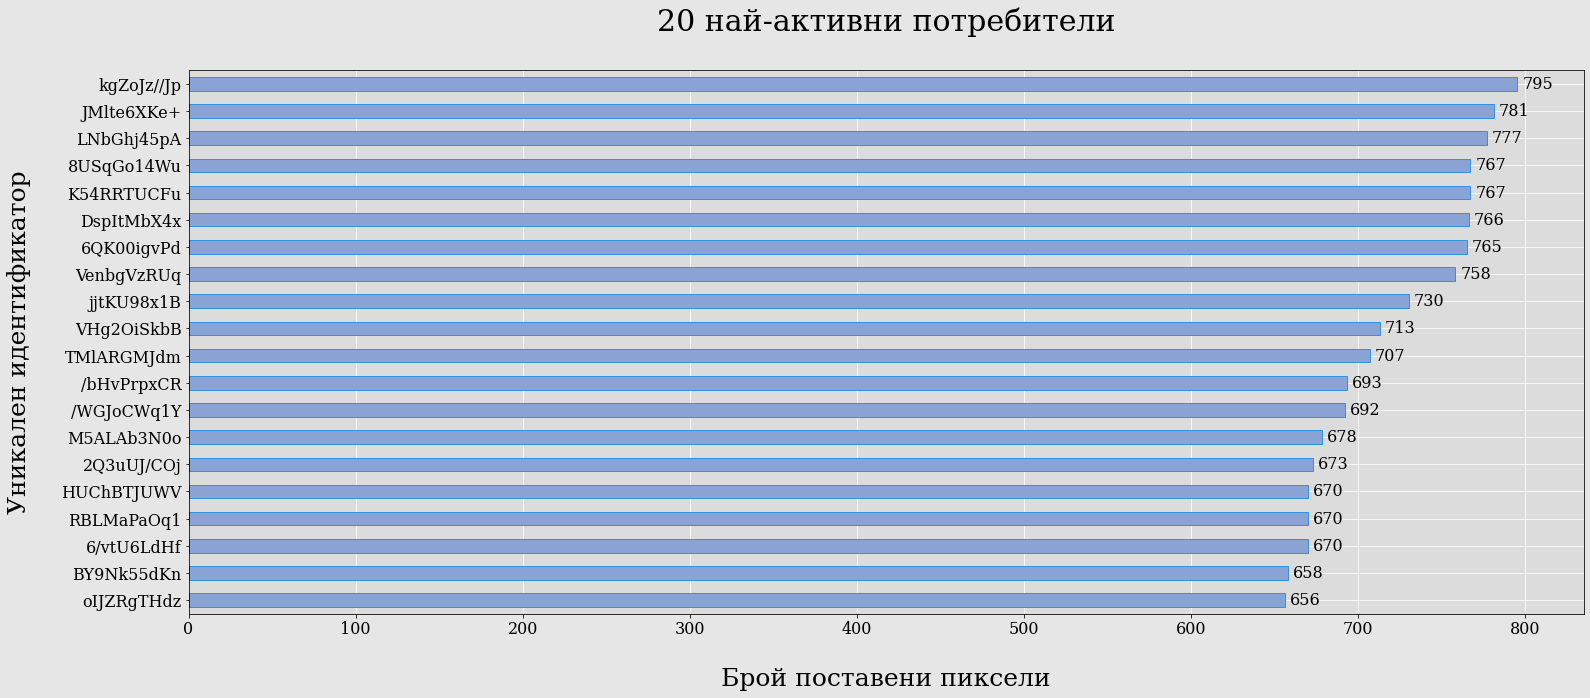

In [21]:
plot = most_active_users.plot(kind='barh', edgecolor='#3193E4')
plot.set_title('20 най-активни потребители')
plot.set_xlabel('Брой поставени пиксели')
plot.set_ylabel('Уникален идентификатор')

y_tick_labels = []
for label in plot.get_yticklabels():
    y_tick_labels.append(label.get_text()[0:10])

plot.set_yticklabels(y_tick_labels)

bar_labels = plot.containers[0]
plot.axes.bar_label(bar_labels, padding=5, fontsize=16)

plot.set_xscale('linear')
plot.invert_yaxis()

plot.get_legend().remove()

In [22]:
now = datetime.now().strftime('%d%H%M')

fig = plot.get_figure()
fig.savefig(f'output\\plot_users-{now}.png')

### Разпръсната диаграма, представяща броят потребители според броят на поставените им пиксели

In [23]:
num_active_users = all_users.num_placed_pixels.value_counts().reset_index(name='users')
num_active_users.head()

,index,users
0,1,2340498
1,2,1175052
2,3,768335
3,4,572021
4,5,460215


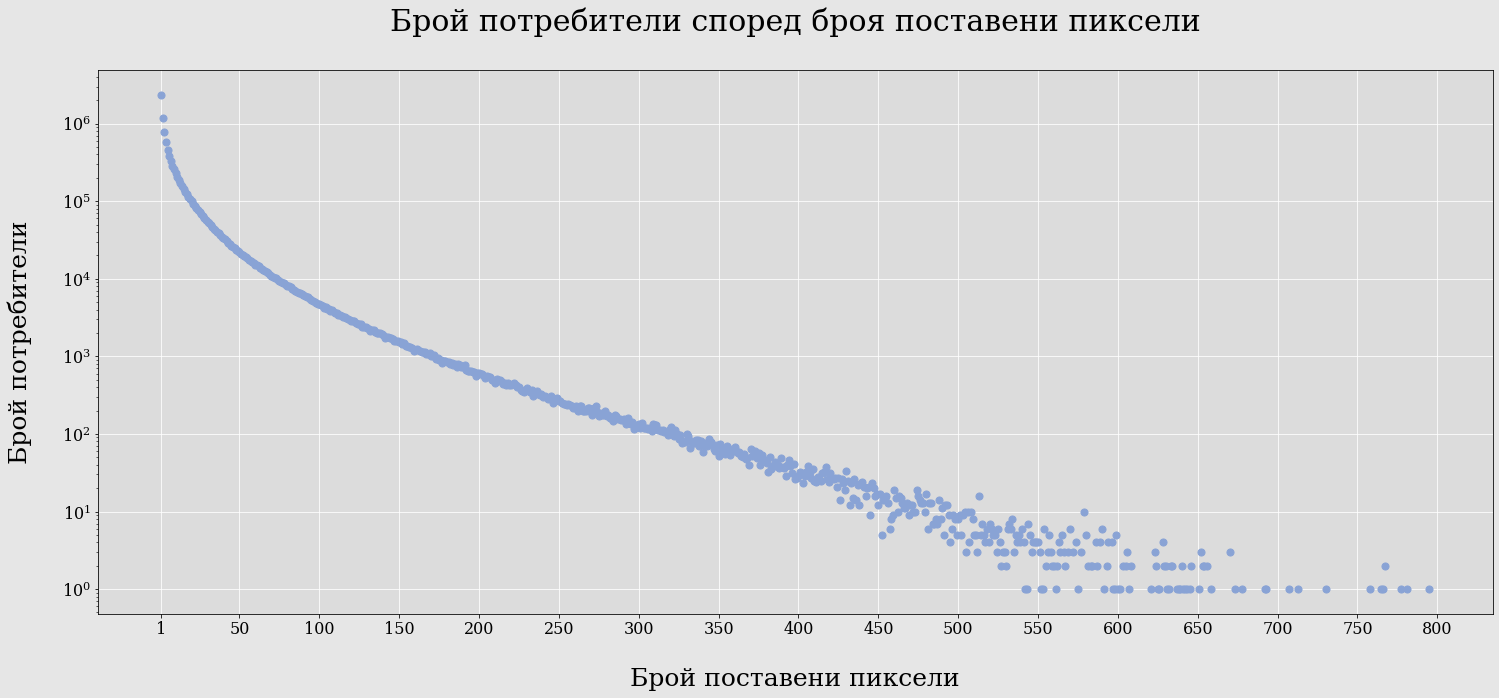

In [24]:
plot = num_active_users.plot(x=0, y=1, kind='scatter', zorder=3, s=50)

plot.set_title('Брой потребители според броя поставени пиксели')
plot.set_xlabel('Брой поставени пиксели')
plot.set_ylabel('Брой потребители')

plot.set_xscale('linear')
plot.set_yscale('log')

plot.set_xticks([1,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])

In [25]:
now = datetime.now().strftime('%d%H%M')

fig = plot.get_figure()
fig.savefig(f'output\\plot_activity-{now}.png')

# Работа с основната информация

## Работа с информация за цветовете

### Диаграма, представяща броят поставени пиксели от всеки цвят

In [26]:
most_used_colors = ddf_main.pixel_color.value_counts().compute()
most_used_colors.head()

#000000    33707371
#FFFFFF    32251013
#FF4500    14411389
#2450A4     9989854
#FFD635     8519392
Name: pixel_color, dtype: int64

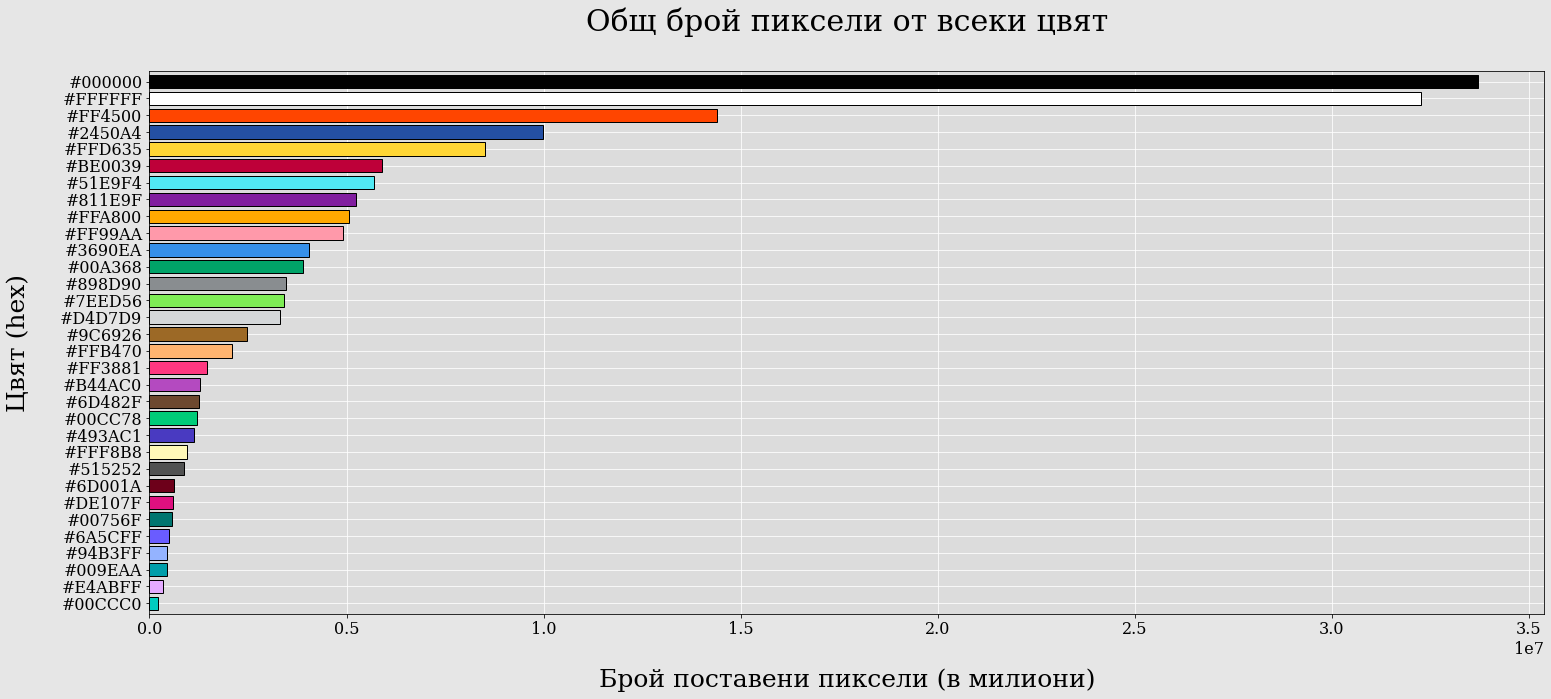

In [27]:
color_bars = []
for color_num in most_used_colors.iteritems():
    color_bars.append(color_num[0])

plot = most_used_colors.plot(kind='barh', color=color_bars, edgecolor='black', zorder=3, width=0.8)

plot.set_title('Общ брой пиксели от всеки цвят')
plot.set_xlabel('Брой поставени пиксели (в милиони)')
plot.set_ylabel('Цвят (hex)')

plot.set_yticklabels(color_bars)
    
plot.set_xscale('linear')
plot.invert_yaxis()

In [28]:
now = datetime.now().strftime('%d%H%M')

fig = plot.get_figure()
fig.savefig(f'output\\plot_colors-{now}.png')

## Работа с информацията за координатите

In [29]:
active_spots = ddf_main.coordinate.value_counts().compute()

### Диаграма, преставяща 20-те най-често променяни точки

In [30]:
top_active_spots = active_spots.head(20)
top_active_spots.head()

0,0        98807
359,564    69198
349,564    55230
859,766    52261
860,766    51485
Name: coordinate, dtype: int64

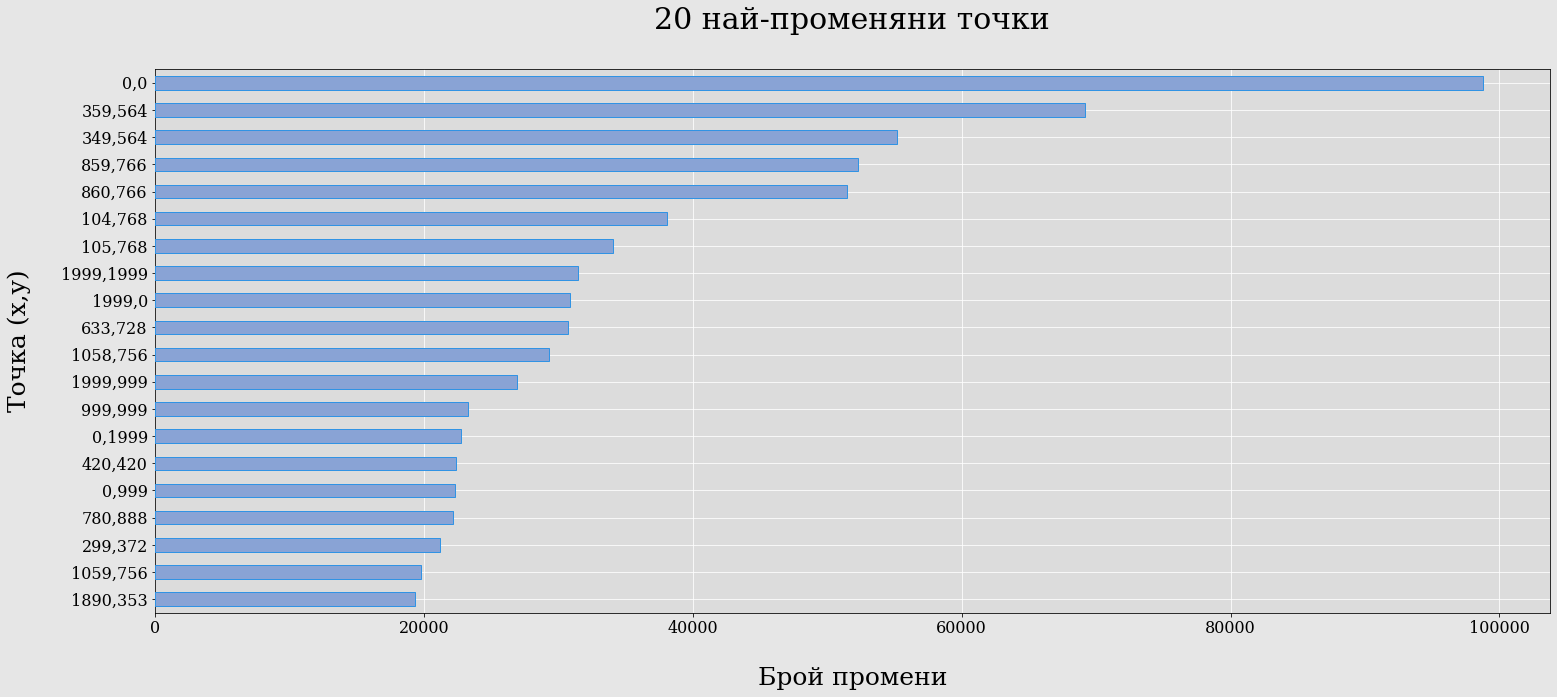

In [31]:
plot = top_active_spots.plot(kind='barh', zorder=3,  edgecolor='#3193E4')

plot.set_title('20 най-променяни точки')
plot.set_xlabel('Брой промени')
plot.set_ylabel('Точка (x,y)')

plot.set_xscale('linear')

plot.invert_yaxis()

In [32]:
now = datetime.now().strftime('%d%H%M')

fig = plot.get_figure()
fig.savefig(f'output\\plot_coordinates-{now}.png')

### Таблица за броя пъти е било нужно модериране

In [81]:
def parse_timestamp(timestamp, date_format):
    timestamp /= 1000
    timestamp = int(timestamp)
    timestamp += 1648806250

    dt = datetime.fromtimestamp(timestamp).strftime(date_format)
    dt = datetime.strptime(dt, date_format)

    return dt

In [85]:
ddf_moderated = ddf_main.copy()

ddf_moderated['comma_count'] = ddf_moderated.coordinate.str.count(',')
ddf_moderated = ddf_moderated.drop(['pixel_color'], axis=1)

ddf_moderated.head()

,timestamp,coordinate,comma_count
0,0,"42,42",1
1,12356,"999,999",1
2,16311,"44,42",1
3,21388,"2,2",1
4,34094,"23,23",1


In [86]:
ddf_moderated = ddf_moderated[ddf_moderated['comma_count'] > 1]
ddf_moderated = ddf_moderated.drop('comma_count', axis=1)
ddf_moderated['timestamp'] = ddf_moderated.apply(lambda x: parse_timestamp(x['timestamp'], '%Y-%m-%d %H%M%S'), axis=1)
 
ddf_moderated.head()

c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\dask\dataframe\core.py:5408: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'datetime64[ns]'))

  warnings.warn(meta_warning(meta))
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\dask\dataframe\core.py:7377: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


,timestamp,coordinate
1168426,2022-04-01 14:44:07,"862,540,868,544"
1203028,2022-04-01 14:46:23,"862,540,873,545"
1207161,2022-04-01 14:46:39,"871,546,878,550"


### Диаграма показваща разпределението на цветовете, поставени в точката (0,0)

In [94]:
ddf_00 = ddf_main.copy()
ddf_00 = ddf_00[ddf_00['coordinate'] == '0,0']
ddf_00 = ddf_00.drop('coordinate', axis=1)

ddf_00.head()

,timestamp,pixel_color
10,169219,#FFA800
59,1184423,#FF4500
62,1184622,#FF4500
158,1192817,#000000
902,1221457,#FF4500


In [95]:
ddf_00['index'] = ddf_00.reset_index().index
ddf_00['timestamp'] = ddf_00.apply(lambda x: parse_timestamp(x['timestamp'], '%Y-%m-%d %H'), axis=1, meta=(None, 'datetime64[ns]'))
ddf_00 = ddf_00.rename(columns={'timestamp': 'datetime'})

ddf_00.head()

,datetime,pixel_color,index
10,2022-04-01 12:00:00,#FFA800,0
59,2022-04-01 13:00:00,#FF4500,1
62,2022-04-01 13:00:00,#FF4500,2
158,2022-04-01 13:00:00,#000000,3
902,2022-04-01 13:00:00,#FF4500,4


In [96]:
ddf_00['pixel_color'] = ddf_00['pixel_color'].astype('category')
ddf_00['pixel_color'] = ddf_00.pixel_color.cat.as_known()

ddf_00.dtypes

datetime       datetime64[ns]
pixel_color          category
index                   int64
dtype: object

In [97]:
ddf00_pivoted = ddf_00.pivot_table(index='datetime', columns='pixel_color', values='pixel_color', aggfunc='count')

ddf00_pivoted.head()

pixel_color,#000000,#00A368,#2450A4,#3690EA,#51E9F4,#7EED56,#811E9F,#898D90,#9C6926,#B44AC0,...,#BE0039,#FF3881,#515252,#6D001A,#94B3FF,#DE107F,#E4ABFF,#FFB470,#00CCC0,#FFF8B8
datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-01 13:00:00,367.0,13.0,34.0,15.0,36.0,27.0,33.0,4.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-01 14:00:00,236.0,12.0,22.0,14.0,28.0,22.0,24.0,3.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-01 15:00:00,112.0,21.0,34.0,16.0,28.0,18.0,22.0,4.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-01 16:00:00,229.0,25.0,54.0,38.0,53.0,43.0,54.0,9.0,11.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Работа с информацията за времето

In [35]:
date_format = '%H:%M %d-%m-%Y'

### Анимирана графика, показваща броя поставени пиксели за всеки час

In [36]:
ddf_date['datetime'] = dd.to_datetime(ddf_date['datetime'])
ddf_date.dtypes

datetime    datetime64[ns]
dtype: object

In [37]:
ddf_datecount = ddf_date.datetime.value_counts('datetime').compute()
ddf_datecount.head()

2022-04-04 21:00:00    5901646
2022-04-04 22:00:00    5640455
2022-04-04 20:00:00    4904479
2022-04-04 19:00:00    4567933
2022-04-03 21:00:00    4480088
Name: datetime, dtype: int64

In [38]:
ddf_datecount = ddf_datecount.reset_index(name='num_placed_pixels').sort_values('index').set_index('index')
ddf_datecount.head()

,num_placed_pixels
index,
2022-04-01 12:00:00,19
2022-04-01 13:00:00,548836
2022-04-01 14:00:00,867847
2022-04-01 15:00:00,996924
2022-04-01 16:00:00,1070919


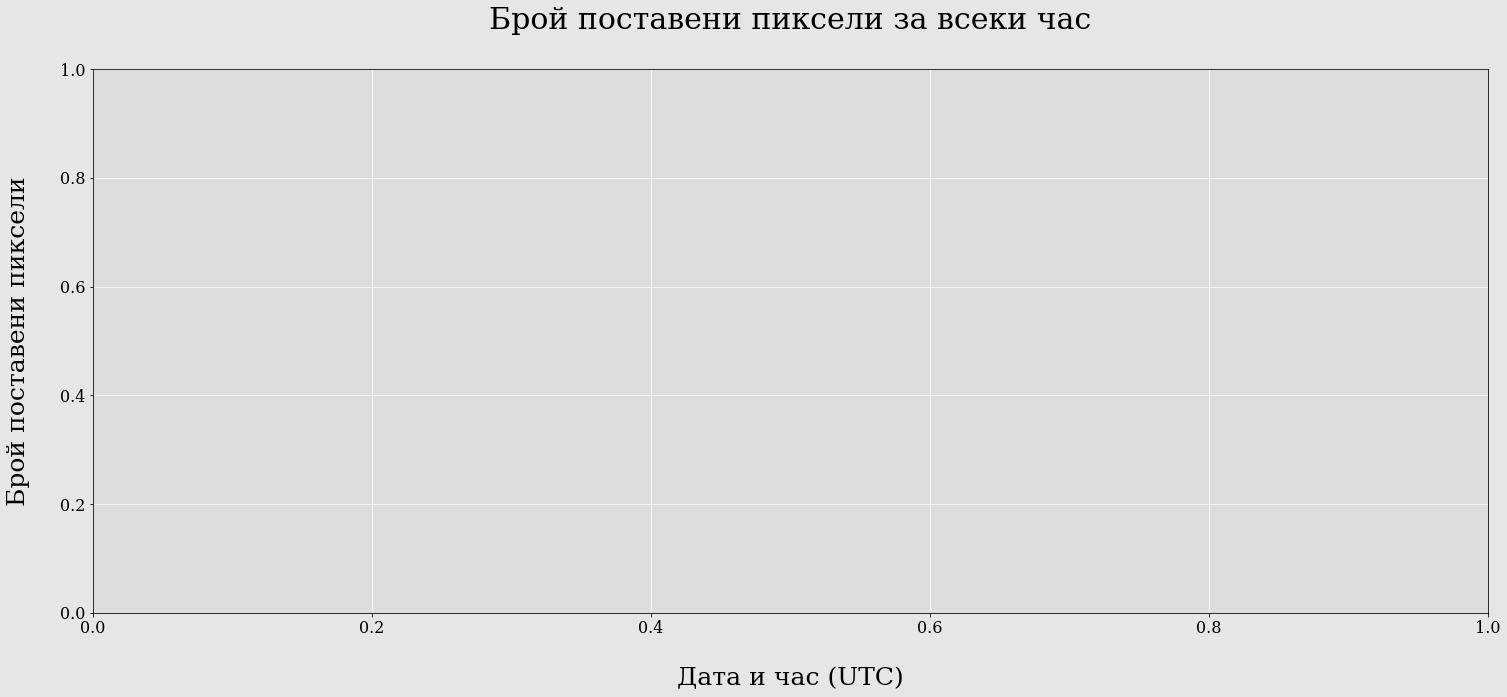

In [39]:
fig = plt.figure()
ax = plt.axes()

ax.set_title('Брой поставени пиксели за всеки час')
ax.set_xlabel('Дата и час (UTC)')
ax.set_ylabel('Брой поставени пиксели')

ax.set_yscale('linear')

ax.get_yaxis().get_major_formatter().set_scientific(False)

In [40]:
now = datetime.now().strftime('%d%H%M')

ddf_datecount.plot_animated(filename=f'output\\animated_activity-{now}.gif', 
    fig=fig, 
    add_legend=False, 
    kind='line', 
    figsize=(25,10),
    period_fmt=date_format,
    period_label=False,
    tick_label_size=16,
    label_events={    
        '  Първи ден': datetime.strptime('00:00 01-04-2022', date_format),
        '  Втори ден': datetime.strptime('00:00 02-04-2022', date_format),
        '  Трети ден': datetime.strptime('00:00 03-04-2022', date_format),
        '  Четвърти ден': datetime.strptime('00:00 04-04-2022', date_format)
    },
    fill_under_line_color='#89A3D5',
    antialiased=True,
    )

Generating LineChart, plotting ['num_placed_pixels']


LineChart(df=                     num_placed_pixels
index                                 
2022-04-01 12:00:00               19.0
2022-04-01 12:12:00           109782.4
2022-04-01 12:24:00           219545.8
2022-04-01 12:36:00           329309.2
2022-04-01 12:48:00           439072.6
...                                ...
2022-04-04 23:12:00          2509747.8
2022-04-04 23:24:00          1962269.6
2022-04-04 23:36:00          1414791.4
2022-04-04 23:48:00           867313.2
2022-04-05 00:00:00           319835.0

[421 rows x 1 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%H:%M %d-%m-%Y', figsize=(25, 10), title=None, fig=<Figure size 1800x720 with 1 Axes>, cmap='dark24', tick_label_size=16, period_label=False, period_summary_func=None, fixed_max=False, dpi=144, writer=None, enable_progress_bar=False, kwargs={'antialiased': True}, line_width=2, label_events={'  Първи ден': datetime.datetime(2022, 4, 1, 0, 0), '  Втори ден': datetime.datetime(20

### Анимирана графика, показваща кумулативния брой поставени пиксели за целия период

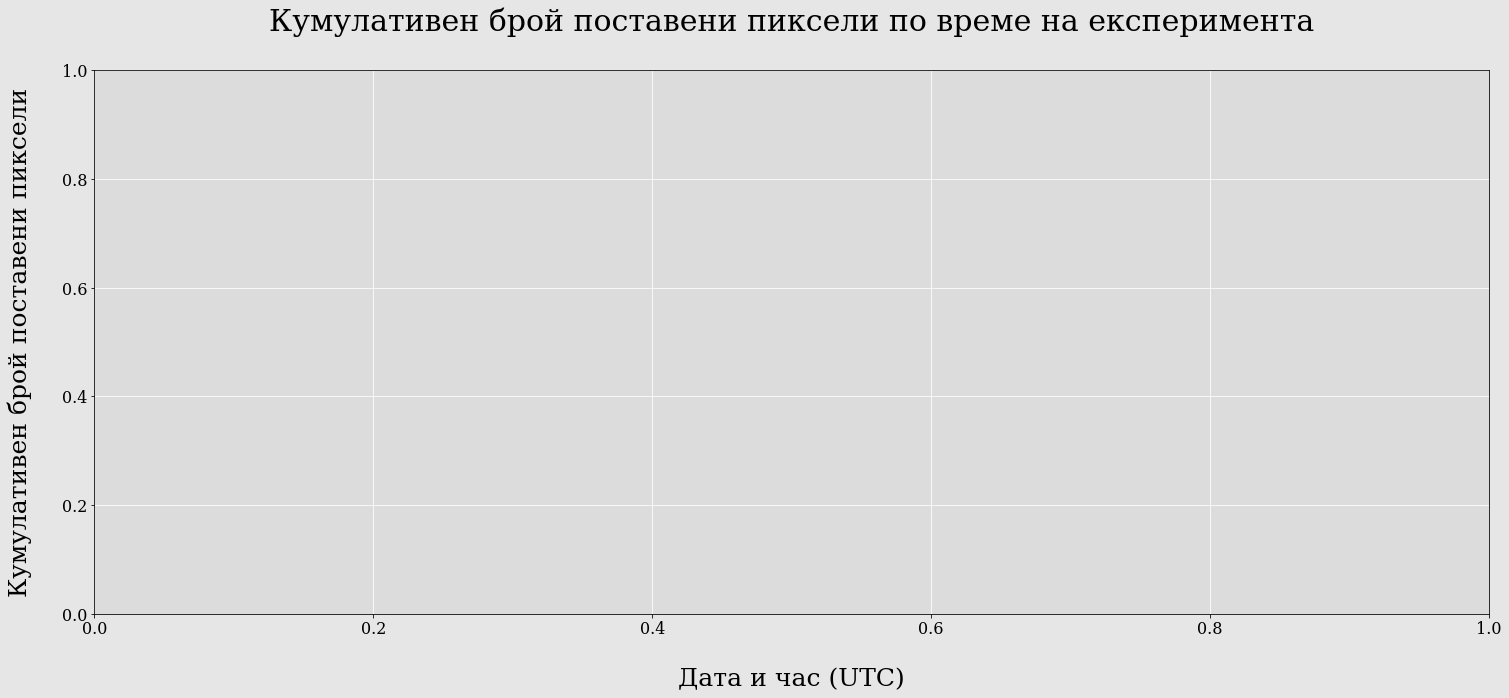

In [41]:
fig = plt.figure()
ax = plt.axes()

ax.set_title('Кумулативен брой поставени пиксели за целият период')
ax.set_xlabel('Дата и час (UTC)')
ax.set_ylabel('Кумулативен брой поставени пиксели')

ax.set_yscale('linear')

In [42]:
now = datetime.now().strftime('%d%H%M')

ddf_datecount.cumsum().plot_animated(filename=f'output\\animated_activity_cumsum-{now}.gif', 
    fig=fig, 
    add_legend=False, 
    kind='line', 
    figsize=(25,10),
    period_fmt=date_format,
    period_label=False,
    tick_label_size=16,
    label_events={    
        '  Първи ден': datetime.strptime('00:00 01-04-2022', date_format),
        '  Втори ден': datetime.strptime('00:00 02-04-2022', date_format),
        '  Трети ден': datetime.strptime('00:00 03-04-2022', date_format),
        '  Четвърти ден': datetime.strptime('00:00 04-04-2022', date_format)
    },
    fill_under_line_color='#89A3D5',
    antialiased=True
    )

Generating LineChart, plotting ['num_placed_pixels']


LineChart(df=                     num_placed_pixels
index                                 
2022-04-01 12:00:00               19.0
2022-04-01 12:12:00           109786.2
2022-04-01 12:24:00           219553.4
2022-04-01 12:36:00           329320.6
2022-04-01 12:48:00           439087.8
...                                ...
2022-04-04 23:12:00        160097236.0
2022-04-04 23:24:00        160161203.0
2022-04-04 23:36:00        160225170.0
2022-04-04 23:48:00        160289137.0
2022-04-05 00:00:00        160353104.0

[421 rows x 1 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%H:%M %d-%m-%Y', figsize=(25, 10), title=None, fig=<Figure size 1800x720 with 1 Axes>, cmap='dark24', tick_label_size=16, period_label=False, period_summary_func=None, fixed_max=False, dpi=144, writer=None, enable_progress_bar=False, kwargs={'antialiased': True}, line_width=2, label_events={'  Първи ден': datetime.datetime(2022, 4, 1, 0, 0), '  Втори ден': datetime.datetime(20

### Анимирана графика, показваща броя и вида поставевни цветове за всеки час

In [43]:
ddf_pivoted['datetime'] = dd.to_datetime(ddf_pivoted['datetime'])
ddf_pivoted = ddf_pivoted.set_index('datetime')

In [44]:
ddf_pivoted = ddf_pivoted.compute()
type(ddf_pivoted)

pandas.core.frame.DataFrame

Text(0.5, 0, 'Брой пиксели')

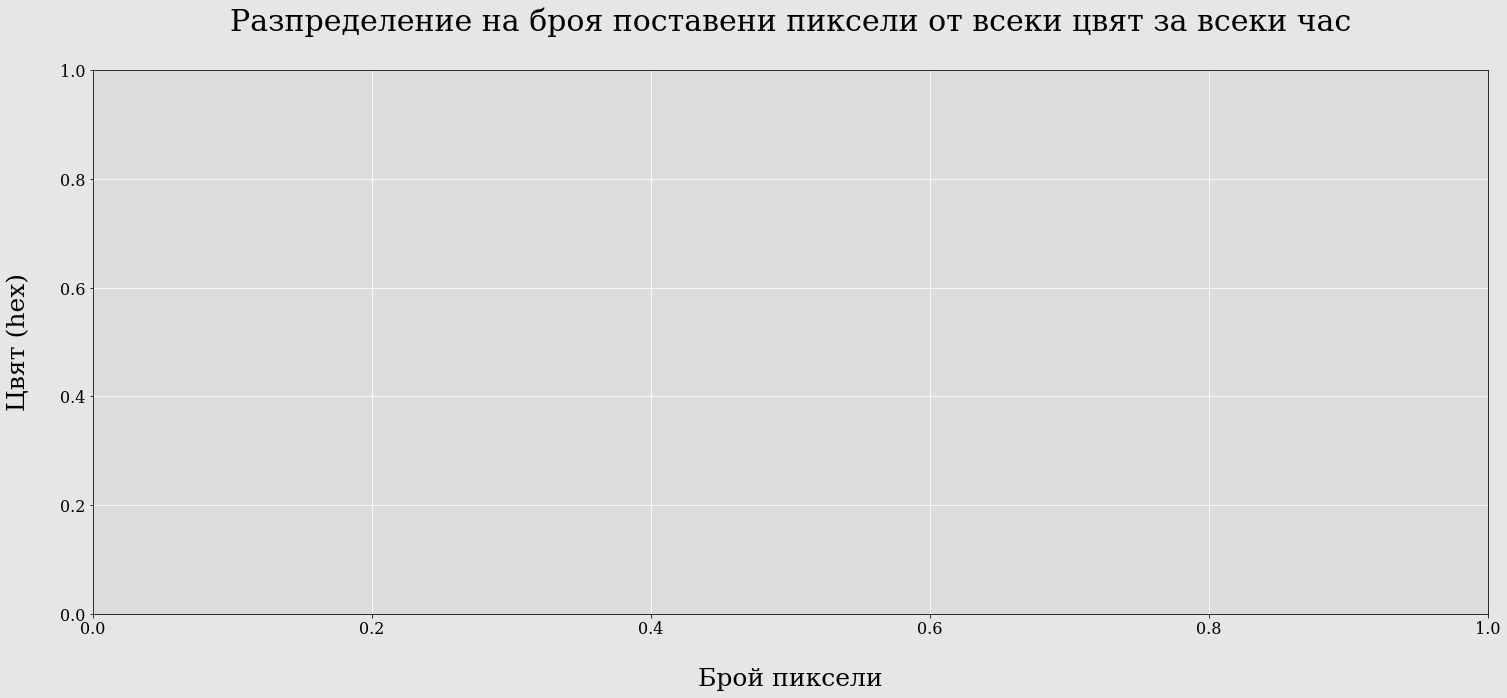

In [45]:
fig = plt.figure()
ax = plt.axes()

ax.set_title('Разпределение на броя поставени пиксели от всеки цвят за всеки час')
ax.set_ylabel('Цвят (hex)')
ax.set_xlabel('Брой пиксели')

In [46]:
now = datetime.now().strftime('%d%H%M')

ddf_pivoted.plot_animated(filename=f'output\\animated_colors-{now}.gif',    
    period_length=700,
    bar_label_size=14,
    add_legend=False, 
    figsize=(25,10),
    fig=fig,
    period_fmt=date_format,
    fixed_order=color_bars,
    period_label=True,
    tick_label_size=14,
    cmap=color_bars,
    antialiased=True
    )

Generating BarChartRace, plotting ['#000000', '#FFFFFF', '#FF4500', '#2450A4', '#FFD635', '#BE0039', '#51E9F4', '#811E9F', '#FFA800', '#FF99AA', '#3690EA', '#00A368', '#898D90', '#7EED56', '#D4D7D9', '#9C6926', '#FFB470', '#FF3881', '#B44AC0', '#6D482F', '#00CC78', '#493AC1', '#FFF8B8', '#515252', '#6D001A', '#DE107F', '#00756F', '#6A5CFF', '#94B3FF', '#009EAA', '#E4ABFF', '#00CCC0']


c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\charts.py:68: UserWarning: Plotting too many bars may result in undesirable output, use `n_visible=15` to limit number of bars
  warnings.warn(
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


BarChartRace(df=                     #000000    #FFFFFF  #FF4500  #2450A4  #FFD635  #BE0039  \
datetime                                                                      
2022-04-01 12:00:00      0.0        4.0      1.0      3.0      0.0      0.0   
2022-04-01 12:12:00  23502.2     6444.4  14010.2  16636.8  13389.8      0.0   
2022-04-01 12:24:00  47004.4    12884.8  28019.4  33270.6  26779.6      0.0   
2022-04-01 12:36:00  70506.6    19325.2  42028.6  49904.4  40169.4      0.0   
2022-04-01 12:48:00  94008.8    25765.6  56037.8  66538.2  53559.2      0.0   
...                      ...        ...      ...      ...      ...      ...   
2022-04-04 23:12:00      0.0  2509747.8      0.0      0.0      0.0      0.0   
2022-04-04 23:24:00      0.0  1962269.6      0.0      0.0      0.0      0.0   
2022-04-04 23:36:00      0.0  1414791.4      0.0      0.0      0.0      0.0   
2022-04-04 23:48:00      0.0   867313.2      0.0      0.0      0.0      0.0   
2022-04-05 00:00:00      0.0   31983

### Анимирана графика, показваща кумулативното разпределение на броя поставевни пиксели от всеки цвят за целия период

Text(0.5, 0, 'Кумумулативен брой пиксели (милиони)')

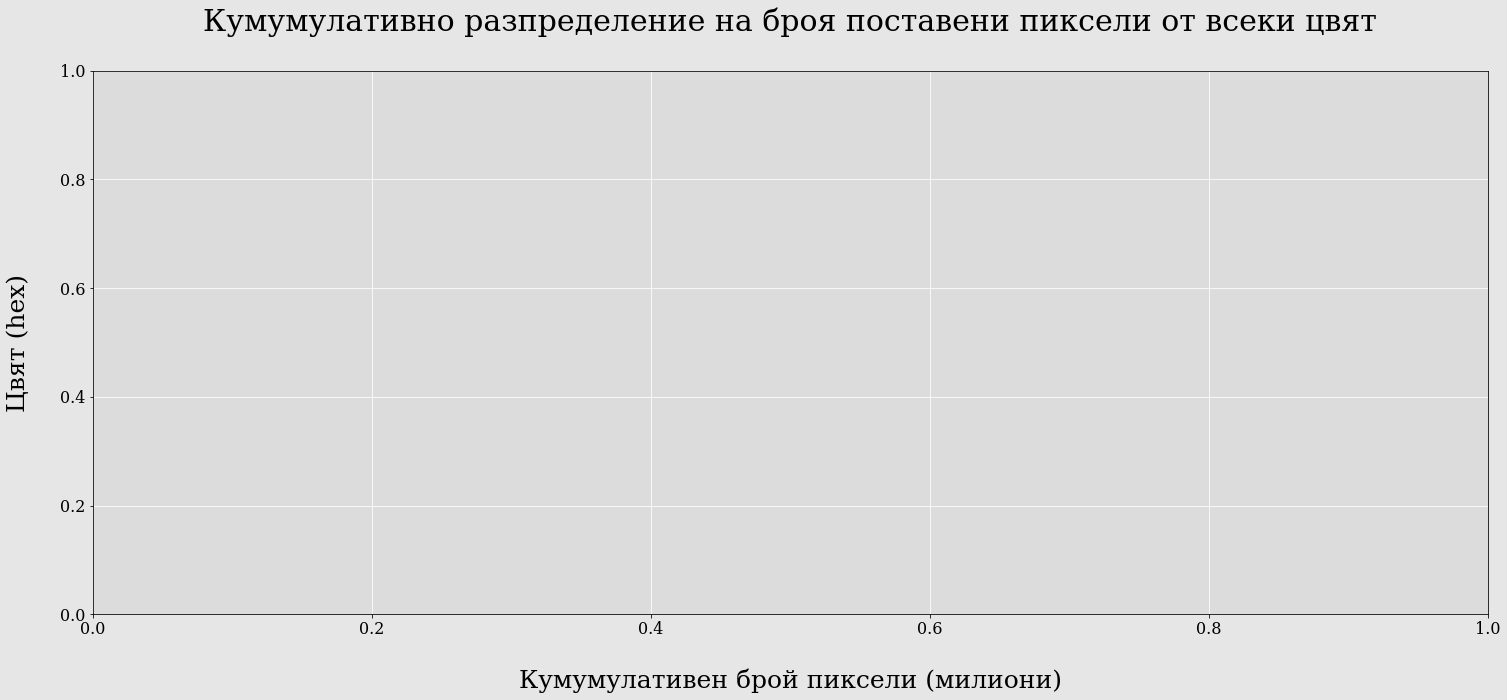

In [47]:
fig = plt.figure()
ax = plt.axes()

ax.set_title('Кумумулативно разпределение на броя поставени пиксели от всеки цвят')
ax.set_ylabel('Цвят (hex)')
ax.set_xlabel('Кумумулативен брой пиксели (милиони)')

In [48]:
now = datetime.now().strftime('%d%H%M')

ddf_pivoted.cumsum().plot_animated(filename=f'output\\animated_colors_cumsum-{now}.gif',    
    period_length=700,
    bar_label_size=14,
    add_legend=False, 
    figsize=(25,10),
    fig=fig,
    period_fmt=date_format,
    fixed_order=color_bars,
    period_label=True,
    tick_label_size=14,
    cmap=color_bars,
    antialiased=True
    )

Generating BarChartRace, plotting ['#000000', '#FFFFFF', '#FF4500', '#2450A4', '#FFD635', '#BE0039', '#51E9F4', '#811E9F', '#FFA800', '#FF99AA', '#3690EA', '#00A368', '#898D90', '#7EED56', '#D4D7D9', '#9C6926', '#FFB470', '#FF3881', '#B44AC0', '#6D482F', '#00CC78', '#493AC1', '#FFF8B8', '#515252', '#6D001A', '#DE107F', '#00756F', '#6A5CFF', '#94B3FF', '#009EAA', '#E4ABFF', '#00CCC0']


c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas_alive\charts.py:68: UserWarning: Plotting too many bars may result in undesirable output, use `n_visible=15` to limit number of bars
  warnings.warn(
c:\Users\Denis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


BarChartRace(df=                        #000000     #FFFFFF     #FF4500    #2450A4    #FFD635  \
datetime                                                                        
2022-04-01 12:00:00         0.0         4.0         1.0        3.0        0.0   
2022-04-01 12:12:00     23502.2      6445.2     14010.4    16637.4    13389.8   
2022-04-01 12:24:00     47004.4     12886.4     28019.8    33271.8    26779.6   
2022-04-01 12:36:00     70506.6     19327.6     42029.2    49906.2    40169.4   
2022-04-01 12:48:00     94008.8     25768.8     56038.6    66540.6    53559.2   
...                         ...         ...         ...        ...        ...   
2022-04-04 23:12:00  33707371.0  31995145.0  14411389.0  9989854.0  8519392.0   
2022-04-04 23:24:00  33707371.0  32059112.0  14411389.0  9989854.0  8519392.0   
2022-04-04 23:36:00  33707371.0  32123079.0  14411389.0  9989854.0  8519392.0   
2022-04-04 23:48:00  33707371.0  32187046.0  14411389.0  9989854.0  8519392.0   
2022-04-05 0